In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/Uber-jan-feb-FOIL.csv")

In [3]:
display(data.head())

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [5]:
display(data.describe())

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [6]:
data['date'] = pd.to_datetime(data['date'])

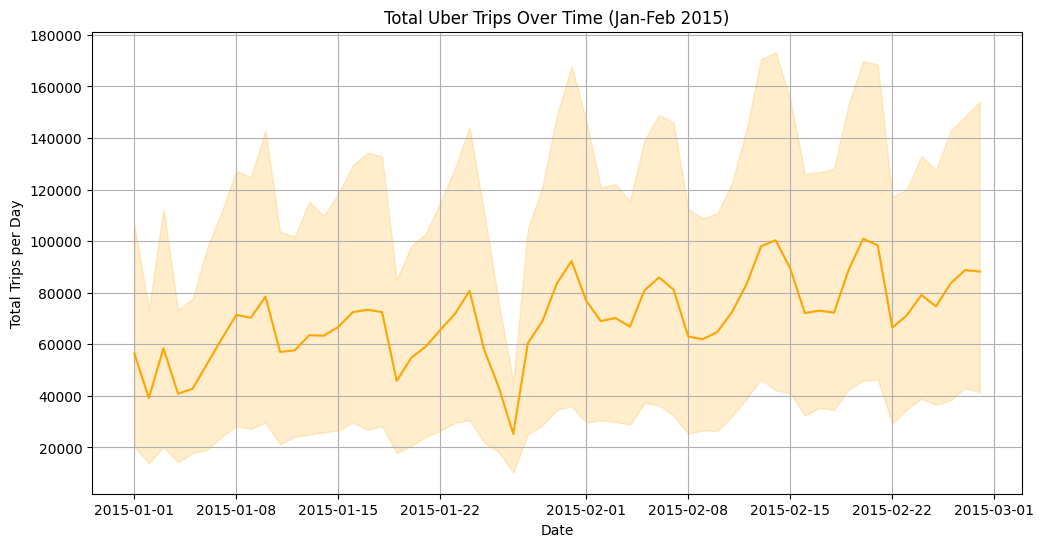

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='trips', data=data, estimator='sum', color='orange')
plt.title("Total Uber Trips Over Time (Jan-Feb 2015)")
plt.xlabel("Date")
plt.ylabel("Total Trips per Day")
plt.grid(True)
plt.show()

In [8]:
daily = data.groupby('date').agg({'trips':'sum', 'active_vehicles':'sum'}).reset_index()

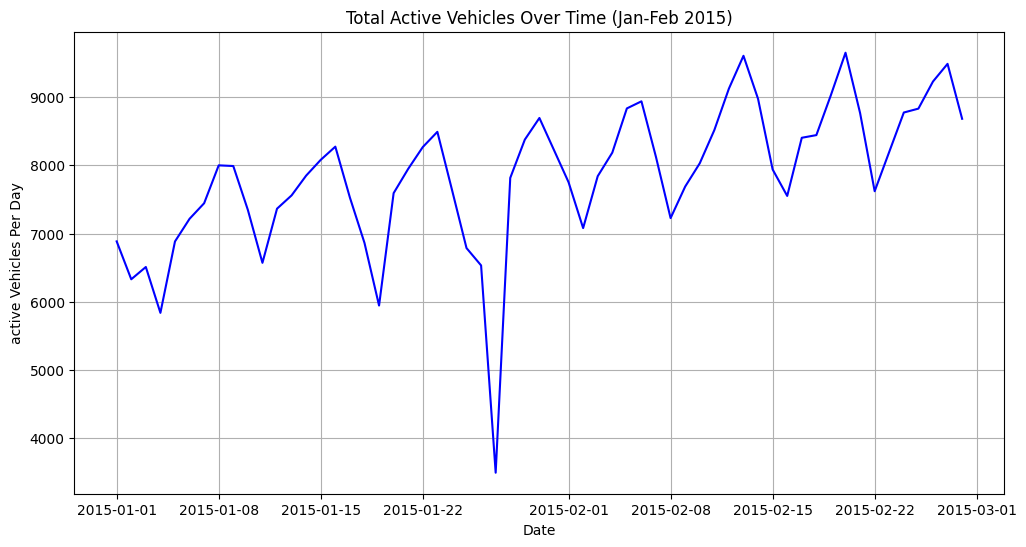

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='active_vehicles', data=daily, color='blue')
plt.title("Total Active Vehicles Over Time (Jan-Feb 2015)")
plt.xlabel("Date")
plt.ylabel("active Vehicles Per Day")
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12276\2528702807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base_trips.index, y=base_trips.values, palette="viridis")


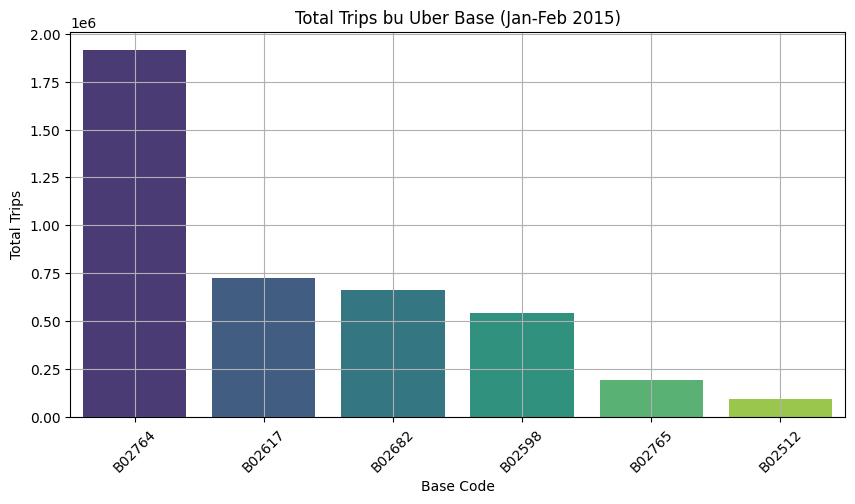

In [10]:
base_trips = data.groupby("dispatching_base_number")["trips"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=base_trips.index, y=base_trips.values, palette="viridis")
plt.title("Total Trips bu Uber Base (Jan-Feb 2015)")
plt.xlabel("Base Code")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

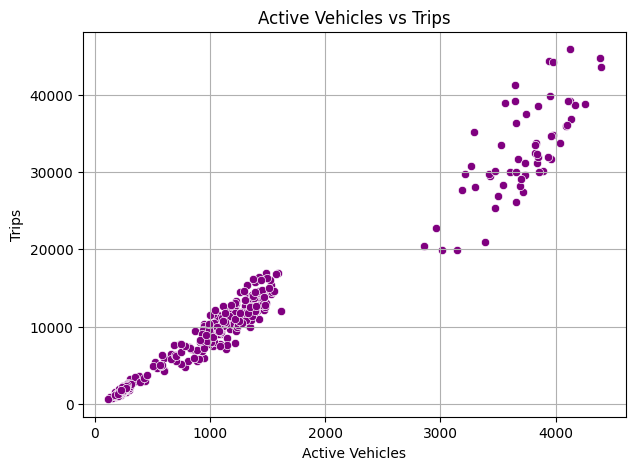

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="active_vehicles", y="trips", data=data, color='purple')
plt.title("Active Vehicles vs Trips")
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.grid(True)
plt.show()